In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

In [2]:
train = pd.read_csv("../dataset/validation/train_complete.csv")
test = pd.read_csv("../dataset/original/test_complete.csv")

In [3]:
train

,queried_record_id,predicted_record_id,predicted_record_id_record,cosine_score,name_cosine,email_cosine,phone_cosine,linked_id_idx,target,editdistance,...,name_popularity,null_address,perc_non_null_address,null_email,perc_non_null_email,null_phone,perc_non_null_phone,case_typo,phone_popularity,test_name_length
0,10000002,10000002,10000002-M1,1.000000,1.000000,0.0,0.0,1,1,0,...,3,1,0,1,0,1,0,0,2,43
1,10000002,10140664,10140664,0.520833,0.520833,0.0,0.0,167911,0,15,...,3,1,0,0,100,0,100,0,2,43
2,10000002,10025741,10025741,0.509804,0.509804,0.0,0.0,31141,0,14,...,3,1,50,2,0,2,0,0,2,43
3,10000002,10025741,10025741-NV0,0.509804,0.509804,0.0,0.0,31142,0,14,...,3,1,50,2,0,2,0,0,2,43
4,10000002,10041218,10041218,0.480000,0.480000,0.0,0.0,49483,0,20,...,3,1,0,1,0,1,0,0,2,43
5,10000002,10043848,10043848,0.450980,0.450980,0.0,0.0,52528,0,18,...,3,2,33,3,0,0,100,0,2,43
6,10000002,10043848,10043848-M0,0.450980,0.450980,0.0,0.0,52529,0,18,...,3,2,33,3,0,0,100,0,2,43
7,10000002,10043848,10043848-NV0,0.450980,0.450980,0.0,0.0,52530,0,18,...,3,2,33,3,0,0,100,0,2,43
8,10000002,10073387,10073387-NV2,0.446809,0.446809,0.0,0.0,87314,0,20,...,3,4,0,1,75,3,25,0,2,43
9,10000002,10073387,10073387-M1,0.446809,0.446809,0.0,0.0,87313,0,20,...,3,4,0,1,75,3,25,0,2,43


In [4]:
columns = ['queried_record_id', 'predicted_record_id', 'predicted_record_id_record', 'cosine_score', 
          'name_cosine', 'email_cosine', 'phone_cosine']

c_train = train[columns].drop_duplicates('queried_record_id', keep='first')
c_test = test[columns].drop_duplicates('queried_record_id', keep='first')

Label

In [5]:
c_train['split_record_id'] = c_train.queried_record_id.str.split('-')
c_train['linked_id'] = [x[0] for x in c_train.split_record_id]
c_train = c_train.drop('split_record_id', axis=1)

In [6]:
c_test['split_record_id'] = c_test.queried_record_id.str.split('-')
c_test['linked_id'] = [x[0] for x in c_test.split_record_id]
c_test = c_test.drop('split_record_id', axis=1)

In [7]:
c_train['linked_id'] = c_train.linked_id.astype(int)
c_test['linked_id'] = c_test.linked_id.astype(int)

In [8]:
# Get in_train set
train_train = pd.read_csv("../dataset/validation/train.csv", escapechar="\\")
train_test = pd.read_csv("../dataset/original/train.csv", escapechar="\\")

In [9]:
train_train = train_train.sort_values(by='record_id').reset_index(drop=True)
train_test = train_test.sort_values(by='record_id').reset_index(drop=True)

In [10]:
train_train['linked_id'] = train_train.linked_id.astype(int)
train_test['linked_id'] = train_test.linked_id.astype(int)
intrain_train = set(train_train.linked_id.values)
intrain_test = set(train_test.linked_id.values)

In [11]:
c_train['label'] = np.isin(c_train.linked_id.values, list(intrain_train))
c_test['label'] = np.isin(c_test.linked_id.values, list(intrain_test))

In [12]:
# 1 if it is in train, 0 is not in train
c_train['label'] = np.where(c_train.label.values == True, 1, 0)
c_test['label'] = np.where(c_test.label.values == True, 1, 0)

In [13]:
c_test

,queried_record_id,predicted_record_id,predicted_record_id_record,cosine_score,name_cosine,email_cosine,phone_cosine,linked_id,label
0,10000003-TST-MR,10010930,10010930-T2,0.533333,0.533333,0.000000,0.000000,10000003,0
50,10000008-TST-M,10043172,10043172-NV0,1.000000,1.000000,0.000000,0.000000,10000008,0
100,10000010-TST-CP,10000010,10000010,1.200000,1.000000,0.000000,1.000000,10000010,1
150,10000013-TST-MR,10153043,10153043,0.826087,0.826087,0.000000,0.000000,10000013,0
200,10000016-TST-MR,10109814,10109814,0.727273,0.727273,0.000000,0.000000,10000016,0
250,10000017-TST-MR,10082842,10082842,0.703704,0.703704,0.000000,0.000000,10000017,0
300,10000018-T4-TST-CP,10000018,10000018-T4,1.400000,1.000000,1.000000,1.000000,10000018,1
350,10000018-TST-M,10000018,10000018-T1,1.400000,1.000000,1.000000,1.000000,10000018,1
400,10000020-NV0-TST-CP,10000020,10000020,1.000000,1.000000,0.000000,0.000000,10000020,1
450,10000020-NV1-TST-M,10000020,10000020,1.200000,1.000000,0.000000,1.000000,10000020,1


In [14]:
original_test = pd.read_csv("../dataset/original/test.csv", escapechar="\\")

In [15]:
validation_test = pd.read_csv("../dataset/validation/test.csv", escapechar="\\")

In [16]:
original_test = original_test.sort_values(by='record_id')
validation_test = validation_test.sort_values(by='record_id')

In [17]:
original_test['split'] = original_test.record_id.str.split('-')
original_test['linked_id'] = [x[0] for x in original_test.split]
original_test['linked_id'] = original_test.linked_id.astype(int)

In [18]:
original_test[~original_test.linked_id.isin(intrain_test)]

,record_id,name,type,address,phone,email,modification,split,linked_id
25144,10000003-TST-MR,"HOTFOCUS CO., LTD.",entity,NaN,4.401574e+11,consulting@outlook.ch,move unique,"[10000003, TST, MR]",10000003
172778,10000008-TST-M,BONUS TRADE LIMITED,entity,NaN,NaN,help@gmail.gov,move row,"[10000008, TST, M]",10000008
45367,10000013-TST-MR,VICTORY GROUP LIMITED,entity,NaN,1.949506e+10,NaN,move unique,"[10000013, TST, MR]",10000013
13876,10000016-TST-MR,"NINGBO RAPID INTERNATIONAL TRADING CO., LTD.",entity,NaN,4.446512e+11,info@outlook.cz,move unique,"[10000016, TST, MR]",10000016
19761,10000017-TST-MR,ANGELIKA INTERNATIONAL LTD.,entity,NaN,NaN,NaN,move unique,"[10000017, TST, MR]",10000017
14475,10000024-TST-MR,LAKE STREET INVESTMENTS LTD.,entity,NaN,4.174193e+12,NaN,move unique,"[10000024, TST, MR]",10000024
101539,10000025-TST-MR,GIT CO INC.,entity,NaN,NaN,NaN,move unique,"[10000025, TST, MR]",10000025
71541,10000028-TST-MR,WINESELECTION S.A.,entity,NaN,3.959136e+09,WINESELECTIONSA@hotmail.de,move unique,"[10000028, TST, MR]",10000028
65493,10000030-TST-MR,KIND INTERNATIONAL INC.,entity,NaN,4.209494e+11,NaN,move unique,"[10000030, TST, MR]",10000030
117403,10000034-TST-M,Alvear Investments Limited,entity,NaN,4.208877e+11,NaN,move row,"[10000034, TST, M]",10000034


# Feature Extraction

In [19]:
# Numero di campi nulli nella riga
# Popolarità del nome
# Quante volte c'è la prima raccomandazione tra le top10 raccomandate
# Quante raccomandazioni diverse facciamo nella top10 (possibilmente proporzionandolo a quante raccomandazioni
# totali del primo elemento raccomandato)
#

# guardare quanti elemnenti non nel train becchiamo se thresholdiamo a 0

## Null field in each row

In [20]:
validation_test['nan_field'] = validation_test.isnull().sum(axis=1)
original_test['nan_field'] = original_test.isnull().sum(axis=1)

In [21]:
c_train = c_train.merge(validation_test[['record_id', 'nan_field']], how='left', left_on='queried_record_id', right_on='record_id').drop('record_id', axis=1)
c_test = c_test.merge(original_test[['record_id', 'nan_field']], how='left', left_on='queried_record_id', right_on='record_id').drop('record_id', axis=1)

In [22]:
c_train

,queried_record_id,predicted_record_id,predicted_record_id_record,cosine_score,name_cosine,email_cosine,phone_cosine,linked_id,label,nan_field
0,10000002,10000002,10000002-M1,1.000000,1.000000,0.000000,0.000000,10000002,1,1
1,10000002-M0,10000002,10000002-M1,1.000000,1.000000,0.000000,0.000000,10000002,1,2
2,10000009,10000009,10000009-NV0,1.200000,1.000000,1.000000,0.000000,10000009,1,2
3,10000012,10064168,10064168-M1,0.652174,0.652174,0.000000,0.000000,10000012,0,1
4,10000019,10000019,10000019-NV0,1.200000,1.000000,0.000000,1.000000,10000019,1,2
5,10000020-NV0,10000020,10000020,1.000000,1.000000,0.000000,0.000000,10000020,1,3
6,10000021,10000021,10000021-M1,1.000000,1.000000,0.000000,0.000000,10000021,1,3
7,10000021-M0,10000021,10000021-M1,1.000000,1.000000,0.000000,0.000000,10000021,1,3
8,10000023-M2,10000023,10000023,1.200000,1.000000,1.000000,0.000000,10000023,1,2
9,10000026,10059296,10059296-T1,0.774194,0.774194,0.000000,0.000000,10000026,0,1


# Scores

In [23]:
s_train = pd.read_csv("../lgb_predictions_validation.csv")
s_test = pd.read_csv("/Users/alessiorussointroito/Downloads/Telegram Desktop/lgb_predictions_full.csv")

In [24]:
s_train.ordered_scores = [eval(x) for x in s_train.ordered_scores]
s_test.ordered_scores = [eval(x) for x in s_test.ordered_scores]

In [25]:
def first_scores(df):
    new_df = []
    for (q, s) in tqdm(zip(df.queried_record_id, df.ordered_scores)):
        new_df.append((q, s[0], s[1]))
    new_df = pd.DataFrame(new_df, columns=['queried_record_id', 'score1', 'score2'])
    return new_df

In [26]:
s_train = first_scores(s_train)
s_test = first_scores(s_test)

In [27]:
c_train = c_train.merge(s_train, how='left', on='queried_record_id')
c_test = c_test.merge(s_test, how='left', on='queried_record_id')

## Quanti linked_id uguali al primo abbiamo tra la top10 / quanti record_id ha il primo linked_id predetto in tutto

In [28]:
from collections import Counter

In [29]:
group_val = train_train.groupby('linked_id').size()
group_test = train_test.groupby('linked_id').size()

In [30]:
group_val = group_val.reset_index().rename(columns={0:'size'})
group_test = group_test.reset_index().rename(columns={0:'size'})

In [31]:
train_complete_list = train[['queried_record_id', 'predicted_record_id']].groupby('queried_record_id').apply(lambda x: list(x['predicted_record_id']))
test_complete_list = test[['queried_record_id', 'predicted_record_id']].groupby('queried_record_id').apply(lambda x: list(x['predicted_record_id']))

In [32]:
train_complete_list = train_complete_list.reset_index().rename(columns={0:'record_id'})
test_complete_list = test_complete_list.reset_index().rename(columns={0:'record_id'})

In [33]:
train_complete_list['size'] = [Counter(x[:10])[x[0]] for x in train_complete_list.record_id]
test_complete_list['size'] = [Counter(x[:10])[x[0]] for x in test_complete_list.record_id]

In [34]:
train_complete_list['first_pred'] = [x[0] for x in train_complete_list.record_id]
test_complete_list['first_pred'] = [x[0] for x in test_complete_list.record_id]

In [35]:
train_complete_list = train_complete_list.merge(group_val, how='left', left_on='first_pred', right_on='linked_id', suffixes=('_pred', '_real')).drop('linked_id', axis=1)
test_complete_list = test_complete_list.merge(group_test, how='left', left_on='first_pred', right_on='linked_id', suffixes=('_pred', '_real')).drop('linked_id', axis=1)

In [36]:
train_complete_list['pred_over_all'] = [ p/r for (p,r) in zip(train_complete_list.size_pred, train_complete_list.size_real)]
test_complete_list['pred_over_all'] = [ p/r for (p,r) in zip(test_complete_list.size_pred, test_complete_list.size_real)]

In [37]:
train_complete_list

,queried_record_id,record_id,size_pred,first_pred,size_real,pred_over_all
0,10000002,"[10000002, 10140664, 10025741, 10025741, 10041...",1,10000002,1,1.000000
1,10000002-M0,"[10000002, 10140664, 10025741, 10025741, 10041...",1,10000002,1,1.000000
2,10000009,"[10000009, 10116598, 10038717, 10185665, 10112...",1,10000009,1,1.000000
3,10000012,"[10064168, 10064168, 10064168, 10147391, 10147...",3,10064168,3,1.000000
4,10000019,"[10000019, 10000019, 10002545, 10002545, 12148...",2,10000019,2,1.000000
5,10000020-NV0,"[10000020, 10000020, 10094948, 10094948, 10094...",2,10000020,2,1.000000
6,10000021,"[10000021, 10000021, 10157497, 10101474, 10082...",2,10000021,2,1.000000
7,10000021-M0,"[10000021, 10000021, 10157497, 10101474, 10082...",2,10000021,2,1.000000
8,10000023-M2,"[10000023, 10000023, 10000023, 10000023, 10000...",6,10000023,6,1.000000
9,10000026,"[10059296, 10059296, 10059296, 10054786, 10054...",3,10059296,5,0.600000


In [38]:
c_train = c_train.merge(train_complete_list[['queried_record_id', 'pred_over_all']], how='left', on='queried_record_id')
c_test = c_test.merge(test_complete_list[['queried_record_id', 'pred_over_all']], how='left', on='queried_record_id')

## Number of different linked_id predicted in top10 & Size of the group in train identified by the first recommended item (E' il size_real precedentemente introdotto )

In [39]:
train_complete_list['n_diff_linked_id'] = [len(set(x[:10])) for x in train_complete_list.record_id]
test_complete_list['n_diff_linked_id'] = [len(set(x[:10])) for x in test_complete_list.record_id]

In [40]:
c_train = c_train.merge(train_complete_list[['queried_record_id', 'size_real', 'n_diff_linked_id']], how='left', on='queried_record_id')
c_test = c_test.merge(test_complete_list[['queried_record_id', 'size_real', 'n_diff_linked_id']], how='left', on='queried_record_id')

# Number of original field equal

# Take the linked_id of the first record predicted, get the relative group of record in train, check how the queried record is similar to the all group

In [54]:
original_test

,record_id,name,type,address,phone,email,modification,split,linked_id,nan_field
25144,10000003-TST-MR,"HOTFOCUS CO., LTD.",entity,NaN,4.401574e+11,consulting@outlook.ch,move unique,"[10000003, TST, MR]",10000003,1
172778,10000008-TST-M,BONUS TRADE LIMITED,entity,NaN,NaN,help@gmail.gov,move row,"[10000008, TST, M]",10000008,2
231755,10000010-TST-CP,NEW IDEA LIMITED,entity,NaN,1.912469e+10,NaN,identical copy,"[10000010, TST, CP]",10000010,2
45367,10000013-TST-MR,VICTORY GROUP LIMITED,entity,NaN,1.949506e+10,NaN,move unique,"[10000013, TST, MR]",10000013,2
13876,10000016-TST-MR,"NINGBO RAPID INTERNATIONAL TRADING CO., LTD.",entity,NaN,4.446512e+11,info@outlook.cz,move unique,"[10000016, TST, MR]",10000016,1
19761,10000017-TST-MR,ANGELIKA INTERNATIONAL LTD.,entity,NaN,NaN,NaN,move unique,"[10000017, TST, MR]",10000017,3
247785,10000018-T4-TST-CP,CHEM D-T Corp.,entity,NaN,3.924568e+09,enquirhs@CHEM.D-T.Corp.ch,identical copy,"[10000018, T4, TST, CP]",10000018,1
173415,10000018-TST-M,CHEM D-T Corp.,entity,NaN,3.924568e+09,inquires@CHEM.D-T.Corp.ch,move row,"[10000018, TST, M]",10000018,1
199638,10000020-NV0-TST-CP,JIE LUN INVESTMENT LIMITED,entity,NaN,NaN,NaN,identical copy,"[10000020, NV0, TST, CP]",10000020,3
147970,10000020-NV1-TST-M,JIE LUN INVESTMENT LIMITED,entity,NaN,3.336016e+11,NaN,move row,"[10000020, NV1, TST, M]",10000020,2


In [55]:
train_test[train_test.linked_id == 10000018]

,record_id,name,type,address,phone,email,modification,linked_id
22,10000018-T0,CHEM D-T Cgrp.,entity,NaN,3.124568e+09,inquires@CHEM.D-T.Corp.ch,typo,10000018
23,10000018-T1,CHEM D-T Corp.,entity,NaN,3.924568e+09,inquires@CHEM.D-T.Corp.ch,typo,10000018
24,10000018-T2,CHEM D-T Corp.,entity,NaN,3.924518e+09,inquires@CHEM.b-T.Corpzch,typo,10000018
25,10000018-T3,CHEM D-T Corp.,entity,NaN,3.924568e+09,inqxires@CiEM.DiT.Corp.ch,typo,10000018
26,10000018-T4,CHEM D-T Corp.,entity,NaN,3.924568e+09,enquirhs@CHEM.D-T.Corp.ch,typo,10000018


# Fit and Predict

In [53]:
c_train

,queried_record_id,predicted_record_id,predicted_record_id_record,cosine_score,name_cosine,email_cosine,phone_cosine,linked_id,label,nan_field,scores,pred_over_all,size_real,n_diff_linked_id
0,10000002,10000002,10000002-M1,1.000000,1.000000,0.000000,0.000000,10000002,1,1,1.461458,1.000000,1,6
1,10000002-M0,10000002,10000002-M1,1.000000,1.000000,0.000000,0.000000,10000002,1,2,1.517637,1.000000,1,6
2,10000009,10000009,10000009-NV0,1.200000,1.000000,1.000000,0.000000,10000009,1,2,1.834547,1.000000,1,8
3,10000012,10064168,10064168-M1,0.652174,0.652174,0.000000,0.000000,10000012,0,1,-2.115646,1.000000,3,7
4,10000019,10000019,10000019-NV0,1.200000,1.000000,0.000000,1.000000,10000019,1,2,2.481573,1.000000,2,5
5,10000020-NV0,10000020,10000020,1.000000,1.000000,0.000000,0.000000,10000020,1,3,1.353556,1.000000,2,4
6,10000021,10000021,10000021-M1,1.000000,1.000000,0.000000,0.000000,10000021,1,3,1.552750,1.000000,2,9
7,10000021-M0,10000021,10000021-M1,1.000000,1.000000,0.000000,0.000000,10000021,1,3,1.552750,1.000000,2,9
8,10000023-M2,10000023,10000023,1.200000,1.000000,1.000000,0.000000,10000023,1,2,1.798541,1.000000,6,4
9,10000026,10059296,10059296-T1,0.774194,0.774194,0.000000,0.000000,10000026,0,1,-1.157358,0.600000,5,6


In [241]:
import lightgbm as lgb
classifier = lgb.LGBMClassifier(max_depth=8, n_estimators=500,reg_alpha=0.2)
cols = ['cosine_score', 'name_cosine', 'email_cosine', 'phone_cosine', 'nan_field', 'pred_over_all', 'size_real', 'n_diff_linked_id', 'score1']
classifier.fit(c_train[cols], c_train['label'])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=8,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.2, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [242]:
preds = classifier.predict(c_test[cols])

In [243]:
preds

array([0, 1, 1, ..., 0, 1, 0])

In [244]:
c_test['predictions'] = preds

In [245]:
c_test['correct_preds'] = np.where(c_test.label.values == c_test.predictions.values, 1, 0)
acc = c_test['correct_preds'].sum() / c_test.shape[0]

In [246]:
acc

0.9314303908898504

In [210]:
from sklearn.metrics import confusion_matrix

In [211]:
cm = confusion_matrix(c_test.label, c_test.predictions)

In [212]:
cm = cm /c_test.shape[0]

In [213]:
cm

array([[0.37733326, 0.06680901],
       [0.0017606 , 0.55409713]])

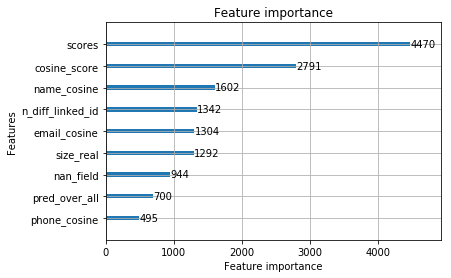

In [214]:
from lightgbm import plot_importance
from matplotlib import pyplot

# plot feature importance
plot_importance(classifier)
pyplot.show()